In [1]:
#!/usr/bin/env python
# vim:fileencoding=utf-8
import sys
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
import matplotlib
import pandas as pd

#データセットの分割
from sklearn.model_selection import train_test_split

In [2]:
#深層学習ライブラリ
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.layers.recurrent import SimpleRNN
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

C:\Users\AdminUser\Anaconda2\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using Theano backend.


In [3]:
#音楽ファイル
Music_file = './Input/02_Business/NHKBusiness.wav'
Music_noise_file = './Input/02_Business/NHKBusiness_whitenoise.wav'

MusicType = 'NHK Business'
MusicFileName = 'NHKBusiness'
NoiseType = 'Whitenoise'

In [4]:
# wavファイル読み込み
Music_wav, Music_fs = sf.read(Music_file)

# ステレオ2chの場合、モノラル音源に変換(左右の各音を2で割った音を足して作成．)
if(Music_wav.shape[1] == 1):
    Music_wavdata = Music_wav
    print(Music_wav.shape[1])
else:
    Music_wavdata = (0.5 * Music_wav[:, 1]) + (0.5 * Music_wav[:, 0])

In [5]:
# wavファイル読み込み
Music_whitenoise_wav, Music_whitenoise_fs = sf.read(Music_noise_file)

# ステレオ2chの場合、モノラル音源に変換(左右の各音を2で割った音を足して作成．)
if(Music_whitenoise_wav.shape[1] == 1):
    Music_whitenoise_wavdata = Music_whitenoise_wav
    print(Music_whitenoise_wav.shape[1])
else:
    Music_whitenoise_wavdata = (0.5 * Music_whitenoise_wav[:, 1]) + (0.5 * Music_whitenoise_wav[:, 0])

In [6]:
#時間軸(信号の場合はLength)
#x = range(300)
x = range(500)

#Y軸は信号データ
#y = Music_whitenoise_wavdata[:300]
y = Music_whitenoise_wavdata[:500]

#学習のフレーム
l = 150

#関数
#信号データと学習のフレームを使用
def make_dataset(y, l):
  data = []
  target = []
  for i in range(len(y)-l):
    data.append(y[i:i+l])
    target.append(y[i + l])
  return(data, target)

#関数呼び出しでデータセットを作成
(data, target) = make_dataset(y, l)

In [7]:
#1フレームのデータ
#data[0]
#len(data[0])
#len(data)
#target
#len(target)

In [8]:
#RNN用のデータセットを作成
#ここで3次元データセットを作成しなくてはならない
data = np.array(data).reshape(-1, l, 1)

In [9]:
num_neurons = 1
n_hidden = 200

model = Sequential()
model.add(SimpleRNN(n_hidden, batch_input_shape=(None, l, num_neurons), return_sequences=False))
model.add(Dense(num_neurons))
model.add(Activation('linear'))
optimizer = Adam(lr = 0.001)
model.compile(loss="mean_squared_error", optimizer=optimizer)
#model.compile(loss="mean_squared_logarithmic_error", optimizer=optimizer)
#model.compile(loss="mean_absolute_percentage_error", optimizer=optimizer)
#model.compile(loss="cosine_similarity", optimizer=optimizer)
#model.compile(loss="mean_absolute_error", optimizer=optimizer)
#early_stopping = EarlyStopping(monitor='val_loss', mode='auto', patience=20)
early_stopping = EarlyStopping(monitor='val_loss', mode='min', patience=20)

In [10]:
#model.fit(data, target, batch_size=300, epochs=100, validation_split=0.1, callbacks=[early_stopping])
model.fit(data, target, batch_size=300, epochs=100, validation_split=0.1, callbacks=[early_stopping])

INFO (theano.gof.compilelock): Waiting for existing lock by process '10816' (I am process '10816')
INFO (theano.gof.compilelock): To manually release the lock, delete C:\Users\AdminUser\AppData\Local\Theano\compiledir_Windows-7-6.1.7601-SP1-Intel64_Family_6_Model_58_Stepping_9_GenuineIntel-2.7.13-64\lock_dir
INFO (theano.gof.compilelock): Waiting for existing lock by process '9856' (I am process '10816')
INFO (theano.gof.compilelock): To manually release the lock, delete C:\Users\AdminUser\AppData\Local\Theano\compiledir_Windows-7-6.1.7601-SP1-Intel64_Family_6_Model_58_Stepping_9_GenuineIntel-2.7.13-64\lock_dir
C:\Users\AdminUser\Anaconda2\lib\site-packages\theano\scan_module\scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation

Train on 315 samples, validate on 35 samples
Epoch 1/100
315/315 [==============================] - 1s 2ms/step - loss: 2.3564e-04 - val_loss: 0.0010
Epoch 2/100
315/315 [==============================] - 1s 3ms/step - loss: 9.7958e-04 - val_loss: 2.5839e-05
Epoch 3/100
315/315 [==============================] - 1s 5ms/step - loss: 3.1471e-05 - val_loss: 2.6616e-05
Epoch 4/100
315/315 [==============================] - 7s 22ms/step - loss: 3.8432e-05 - val_loss: 7.9274e-04
Epoch 5/100
315/315 [==============================] - 2s 5ms/step - loss: 7.7342e-04 - val_loss: 8.9264e-05
Epoch 6/100
315/315 [==============================] - 2s 6ms/step - loss: 9.0162e-05 - val_loss: 3.0279e-05
Epoch 7/100
315/315 [==============================] - 1s 3ms/step - loss: 3.2234e-05 - val_loss: 3.1378e-05
Epoch 8/100
315/315 [==============================] - 1s 4ms/step - loss: 3.2894e-05 - val_loss: 3.0587e-05
Epoch 9/100
315/315 [==============================] - 1s 2ms/step - loss: 3.1412e-05 

INFO (theano.gof.compilelock): Waiting for existing lock by process '6764' (I am process '10816')
INFO (theano.gof.compilelock): To manually release the lock, delete C:\Users\AdminUser\AppData\Local\Theano\compiledir_Windows-7-6.1.7601-SP1-Intel64_Family_6_Model_58_Stepping_9_GenuineIntel-2.7.13-64\lock_dir
INFO (theano.gof.compilelock): Waiting for existing lock by process '7796' (I am process '10816')
INFO (theano.gof.compilelock): To manually release the lock, delete C:\Users\AdminUser\AppData\Local\Theano\compiledir_Windows-7-6.1.7601-SP1-Intel64_Family_6_Model_58_Stepping_9_GenuineIntel-2.7.13-64\lock_dir
C:\Users\AdminUser\Anaconda2\lib\site-packages\theano\scan_module\scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.

<Figure size 432x288 with 0 Axes>

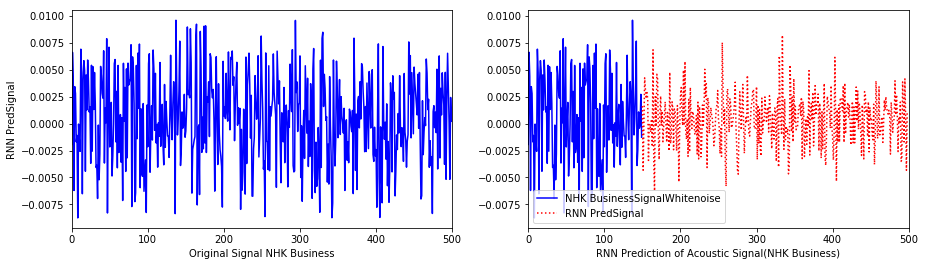

In [11]:
fig = plt.figure(1)

#検証ではノイズがないデータを使用すること
pred = model.predict(data)

#Y軸のラベル
Signal_Ylabel_str = MusicType + 'Signal' + NoiseType
RNN_Ylabel_str = 'RNN Pred' + 'Signal'

plt.figure(figsize=(15, 4))
plt.subplot(1, 2, 1)
plt.xlim(0, 500)
plt.plot(x, y, color='blue')
plt.xlabel('Original Signal ' + MusicType)
plt.ylabel(RNN_Ylabel_str)
 
plt.subplot(1, 2, 2)
plt.xlim(0, 500)
plt.plot(x[:l], y[:l], color='blue', label=Signal_Ylabel_str)
plt.plot(x[l:], pred, color='red', label=RNN_Ylabel_str, linestyle="dotted")
plt.xlabel('RNN Prediction of Acoustic Signal(' + MusicType + ')')
plt.legend(loc='lower left')

#plt.savefig
fig.set_tight_layout(True)
plt.savefig('./Output/RNN_Pred_Signal/RNN_' + NoiseType + '_' + MusicFileName + '.png')
plt.show()

In [12]:
#シグナル値
pd_y = pd.DataFrame(y[:l],columns=["Signal"])
pd_pred = pd.DataFrame(pred,columns=["Signal"])
pd_concat_y = pd.concat([pd_y,pd_pred], axis=0)
pd_concat_y = pd_concat_y.reset_index(drop=True)

#時間軸
pd_pandas_x = pd.DataFrame(range(500),columns=["Time"])

#信号配列
pd_concat_Signal = pd.concat([pd_pandas_x,pd_concat_y], axis=1)

#保存
pd_concat_Signal.to_csv('./Output/RNN_Pred_Signal/RNN_' + NoiseType + '_' + MusicFileName + '.csv')
pd_concat_Signal

,Time,Signal
0,0,-0.001938
1,1,0.006622
2,2,0.004395
3,3,-0.006210
4,4,0.003433
5,5,0.002792
6,6,-0.001694
7,7,-0.001099
8,8,-0.008759
9,9,-0.000046
